In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
fruits = np.load("/home/yjh/kubig2025/ml_dl_python/data/fruits_300.npy")
print(fruits.shape)

(300, 100, 100)


In [28]:
fruits_2d = fruits.reshape(300, 10000)

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(fruits_2d)

PCA(n_components=10)

In [30]:

print(pca.components_.shape)

(10, 10000)


In [31]:
def draw_fruits(arr: np.ndarray, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(
        rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False
    )
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap="gray_r")
            axs[i, j].axis("off")
    plt.show()

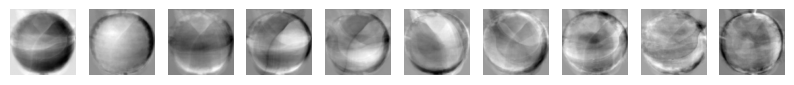

In [32]:

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [33]:

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10)


In [34]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


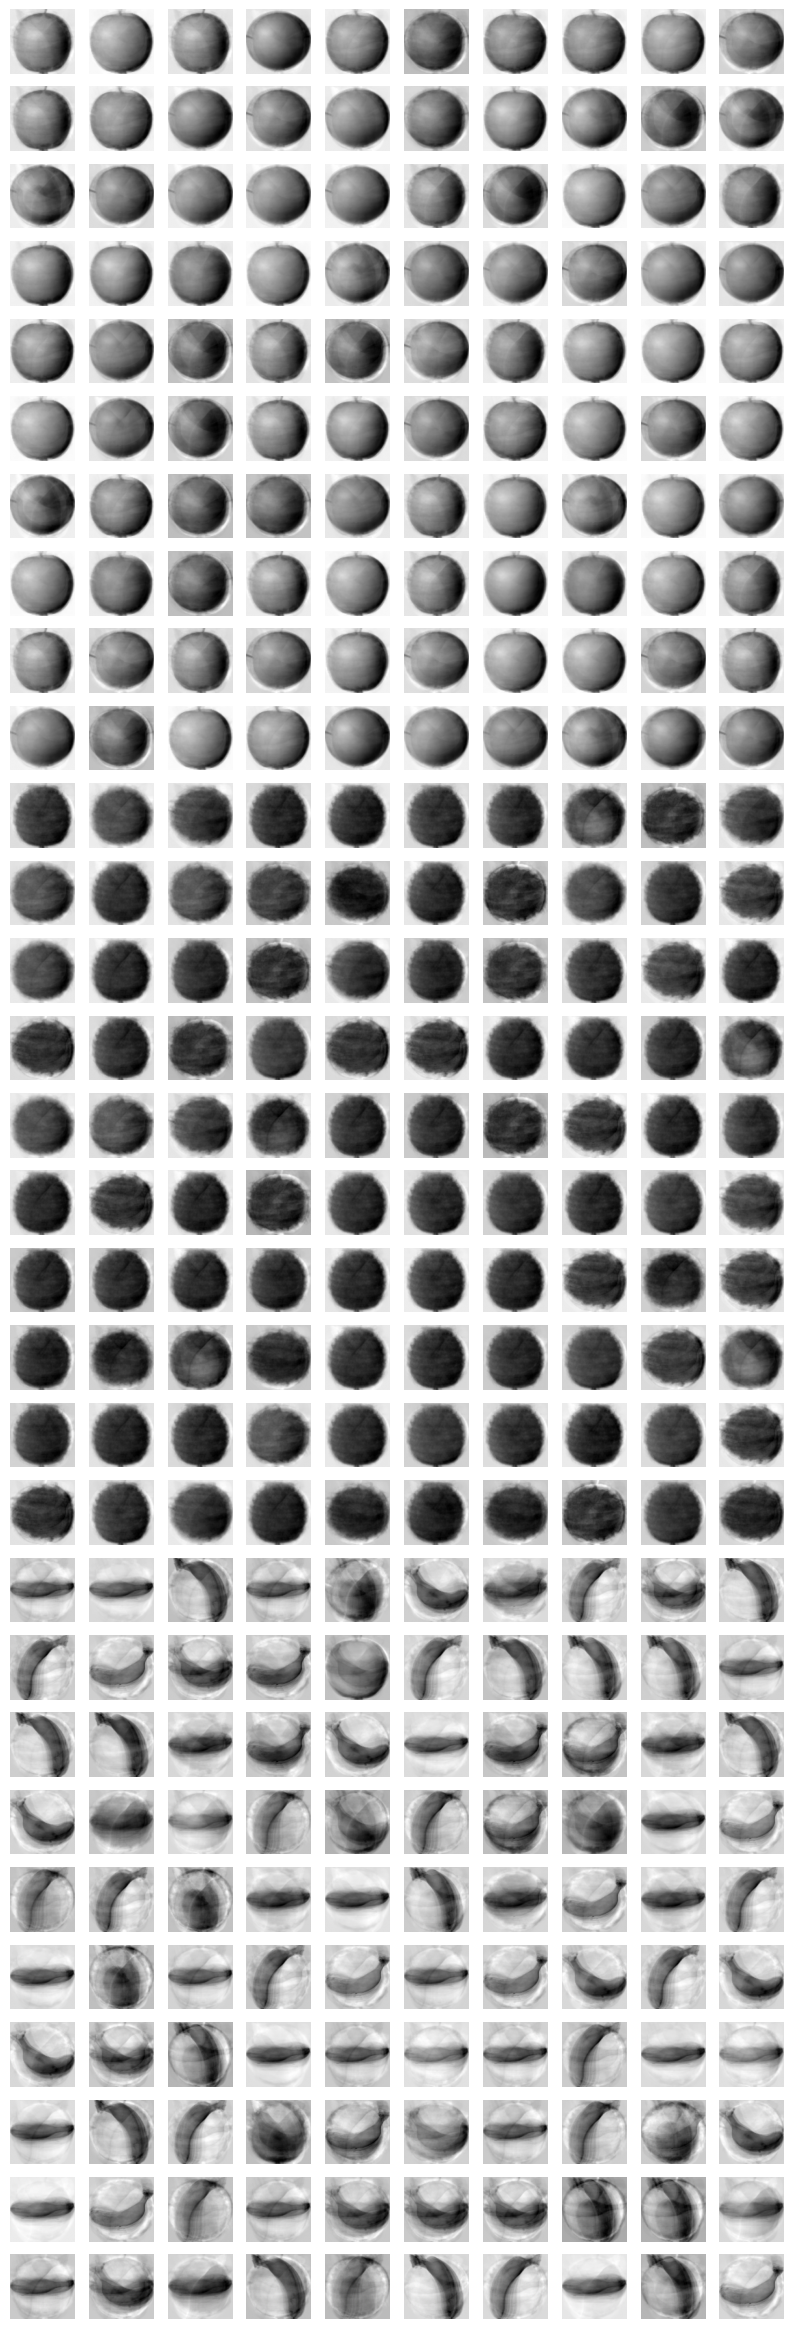

In [35]:
draw_fruits(fruits_inverse.reshape(300, 100, 100))

In [36]:
print(np.sum(pca.explained_variance_ratio_))

0.7694928897679298


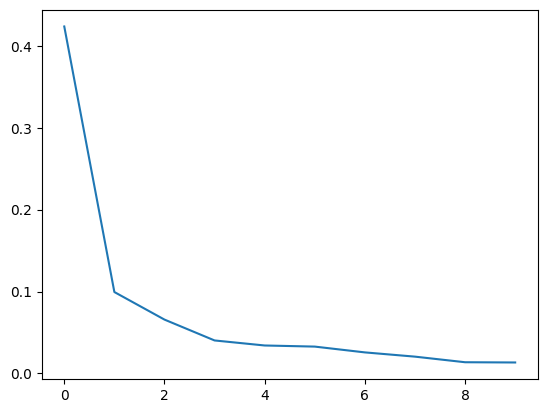

In [37]:
plt.plot(pca.explained_variance_ratio_)

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [39]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [40]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
1.6166086673736573


In [41]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.02319951057434082


In [42]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [43]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


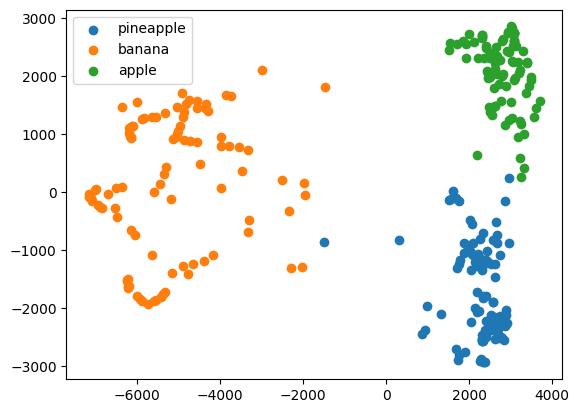

In [44]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]  # 10 개
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(["pineapple", "banana", "apple"])
plt.show()

In [46]:
# 계층적 군집화
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

cluster = AgglomerativeClustering(n_clusters=10, metric="euclidean", linkage="ward")
labels = cluster.fit(fruits_pca)

In [47]:
print(labels.labels_)

[4 8 4 3 8 4 8 8 8 3 4 8 3 3 3 4 8 3 4 3 3 3 3 3 3 4 4 8 3 4 8 8 8 8 3 3 3
 3 3 3 8 3 4 4 4 3 4 8 8 8 8 3 4 8 8 3 8 8 3 8 3 8 4 4 3 4 8 3 8 4 8 8 4 8
 8 4 8 8 8 4 4 3 4 3 8 3 8 8 3 4 3 4 8 8 3 3 3 3 4 3 6 2 2 6 6 6 6 2 2 2 2
 6 2 2 2 6 2 2 6 2 2 6 6 2 2 6 2 6 2 6 2 6 2 6 2 2 6 6 6 2 2 2 2 2 6 6 2 2
 6 6 6 2 6 2 6 6 6 6 6 2 6 6 6 6 6 6 6 2 2 2 6 2 2 2 6 6 6 6 2 2 6 6 6 2 6
 6 6 6 6 2 2 6 2 6 2 6 2 2 6 2 1 1 7 1 0 0 1 5 0 7 5 9 0 9 0 5 7 7 7 1 7 7
 1 9 0 1 9 9 1 7 0 1 1 5 0 5 9 0 1 9 5 5 0 1 1 7 1 9 1 5 1 0 1 5 9 1 9 0 5
 0 0 0 7 1 1 1 1 5 1 1 1 7 5 0 9 0 1 5 9 0 1 9 5 1 0 0 0 7 7 1 1 0 1 7 5 7
 5 1 7 9]


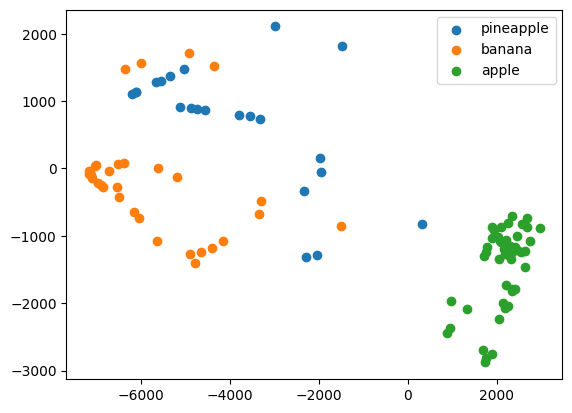

In [48]:
for label in range(0, 3):
    data = fruits_pca[labels.labels_ == label]  # 10 개
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(["pineapple", "banana", "apple"])
plt.show()

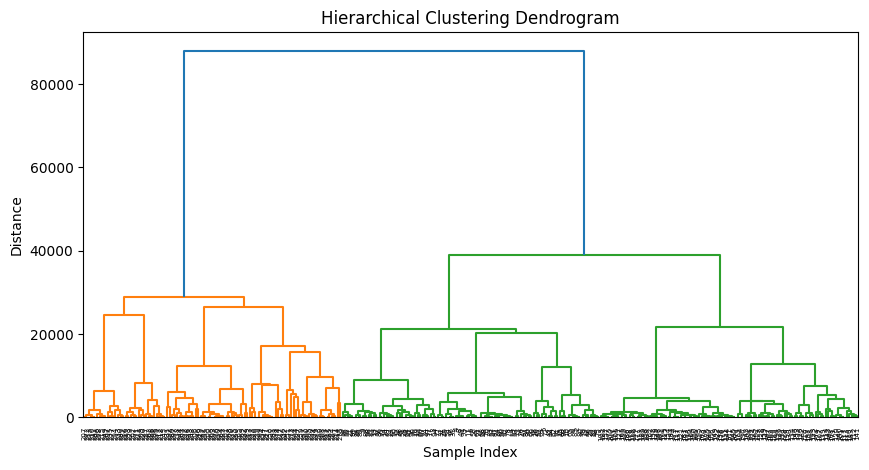

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# linkage matrix 생성 (ward 방식, metric="euclidean")
linked = linkage(fruits_pca, method="ward", metric="euclidean")

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()